Importing the Dependencies

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [0]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/dbfs/FileStore/shared_uploads/salmankadaya@gmail.com/diabetes.csv') 

In [0]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

Out[10]:

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']
print(X)
print(Y)

Pregnancies Glucose BloodPressure ... BMI DiabetesPedigreeFunction Age
0 6 148 72 ... 33.6 0.627 50
1 1 85 66 ... 26.6 0.351 31
2 8 183 64 ... 23.3 0.672 32
3 1 89 66 ... 28.1 0.167 21
4 0 137 40 ... 43.1 2.288 33
.. ... ... ... ... ... ... ...
763 10 101 76 ... 32.9 0.171 63
764 2 122 70 ... 36.8 0.340 27
765 5 121 72 ... 26.2 0.245 30
766 1 126 60 ... 30.1 0.349 47
767 1 93 70 ... 30.4 0.315 23

[768 rows x 8 columns]
0 1
1 0
2 1
3 0
4 1
 ..
763 0
764 0
765 0
766 1
767 0
Name: Outcome, Length: 768, dtype: int64

Train Test Split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)

Training the Model

In [0]:
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
model = classifier.fit(X_train, Y_train)

In [0]:
y_pred = model.predict(X_test)
print(y_pred)
#y_pred_prob = model.predict_proba(X_test)
#print(y_pred_prob)

[0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0]

--------------------------------------------------------------------------- 
 AttributeError Traceback (most recent call last)
 <command-34632106894055> in <module> 
 1 y_pred = model . predict ( X_test ) 
 2 print ( y_pred ) 
 ----> 3 y_pred_prob = model . predict_proba ( X_test ) 
 4 print ( y_pred_prob ) 

 /databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py in predict_proba (self) 
 664 datasets . 
 665 """
 --> 666 self . _check_proba ( ) 
 667 return self . _predict_proba
 668 

 /databricks/python/lib/python3.8/site-packages/sklearn/svm/_base.py in _check_proba (self) 
 631 def _check_proba ( self ) : 
 632 if not self . probability : 
 --> 633 raise AttributeError("predict_proba is not available when "
 634 " probability=False")
 635 if self . _impl not in ( 'c_svc' , 'nu_svc' ) : 

 AttributeError : predict_proba is not available when probability=False

Model Evaluation

Accuracy Score

In [0]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data : 0.7833876221498371

In [0]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data : 0.7727272727272727

Making a Predictive System

In [0]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic

Saving the trained model

In [0]:
import pickle
filename = 'trained_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [0]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.pkl', 'rb'))

In [0]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic

In [0]:
!mlflow --version

mlflow, version 2.1.1

In [0]:
def get_metrics(y_true, y_pred):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,log_loss
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred,average='micro')
    recall = recall_score(y_true, y_pred,average='micro')
    return {'accuracy': round(acc, 2), 'precision': round(prec, 2), 'recall': round(recall, 2)}

In [0]:
run_metrics = get_metrics(Y_test, y_pred)
run_metrics

Out[33]: {'accuracy': 0.77, 'precision': 0.77, 'recall': 0.77}

In [0]:
def create_confusion_matrix_plot(clf, X_test, Y_test):
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(clf, X_test, Y_test)
    plt.savefig('confusion_matrix.png')

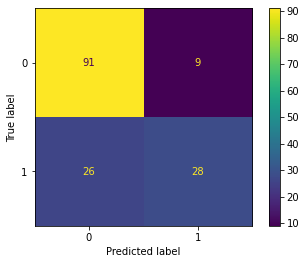

In [0]:
create_confusion_matrix_plot(model, X_test, Y_test)

Define create_experiment function to track your model experiment within MLFlow
Adding an MLflow Model to the Model Registry
Execute the create_experiment function and log experiment

In [0]:
def create_experiment(experiment_name,run_name, run_metrics,model, confusion_matrix_path = None, 
                      roc_auc_plot_path = None, run_params=None):
    import mlflow
    mlflow.set_experiment(experiment_name)
    
    with mlflow.start_run(run_name=run_name):
        
        if not run_params == None:
            for param in run_params:
                mlflow.log_param(param, run_params[param])
            
        for metric in run_metrics:
            mlflow.log_metric(metric, run_metrics[metric])
        
        
        
        if not confusion_matrix_path == None:
            mlflow.log_artifact(confusion_matrix_path, 'confusion_materix')
            
        if not roc_auc_plot_path == None:
            mlflow.log_artifact(roc_auc_plot_path, "roc_auc_plot")
        
        mlflow.set_tag("tag1", "Iris Classifier")
        mlflow.set_tags({"tag2":"Logistic Regression", "tag3":"Multiclassification using Ovr - One vs rest class"})
        mlflow.sklearn.log_model(model, "model" ,registered_model_name="iris-classifier")
    print('Run - %s is logged to Experiment - %s' %(run_name, experiment_name))

In [0]:
from datetime import datetime
experiment_name = "/Users/salmankadaya@gmail.com/MLOps/iris_classifier_"+ str(datetime.now().strftime("%d-%m-%y")) ##basic classifier
run_name="iris_classifier_"+str(datetime.now().strftime("%d-%m-%y"))
create_experiment(experiment_name,run_name,run_metrics,model,'confusion_matrix.png')

Successfully registered model 'iris-classifier'.
2023/01/02 12:17:22 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: iris-classifier, version 1
Created version '1' of model 'iris-classifier'.
Run - iris_classifier_02-01-23 is logged to Experiment - /Users/salmankadaya@gmail.com/MLOps/iris_classifier_02-01-23

In [0]:
import mlflow
logged_model = 'runs:/b52ef8dac45243458ec1b9eacbe3204e/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_test))

Out[42]: array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

Transitioning an MLflow Model’s Stage

In [0]:
client = mlflow.tracking.MlflowClient()
client.transition_model_version_stage(
    name="iris-classifier",
    version=1,
    stage="Staging"
)

Out[45]: <ModelVersion: creation_timestamp=1672661841996, current_stage='Staging', description='', last_updated_timestamp=1672662046880, name='iris-classifier', run_id='fc72c15bdb334abd816413349b5b1110', run_link='', source='dbfs:/databricks/mlflow-tracking/34632106894061/fc72c15bdb334abd816413349b5b1110/artifacts/model', status='READY', status_message='', tags={}, user_id='7544624240283973', version='1'>

In [0]:
import mlflow.pyfunc

model_name = "iris-classifier"
stage = 'Staging'

model = mlflow.pyfunc.load_model(
    model_uri=f"models:/{model_name}/{stage}"
)

y_pred = model.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0]

In [0]:
%r
mlflow models build-docker --model-uri "runs:/b52ef8dac45243458ec1b9eacbe3204e/model" --name "my-image-name"

Error in parse(text = DATABRICKS_CURRENT_TEMP_CMD__): <text>:2:8: unexpected symbol
1: {
2: mlflow models
 ^